In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Obtenção de dados da Apple
aapl = web.get_data_yahoo("AAPL")

In [3]:
# let play around with Apple data by calculating the log daily return
# vamos brincar com os dados do Apple calculando o retorno diário do log

aapl['LogReturn'] = np.log(aapl['Close']).shift(-1) - np.log(aapl['Close'])

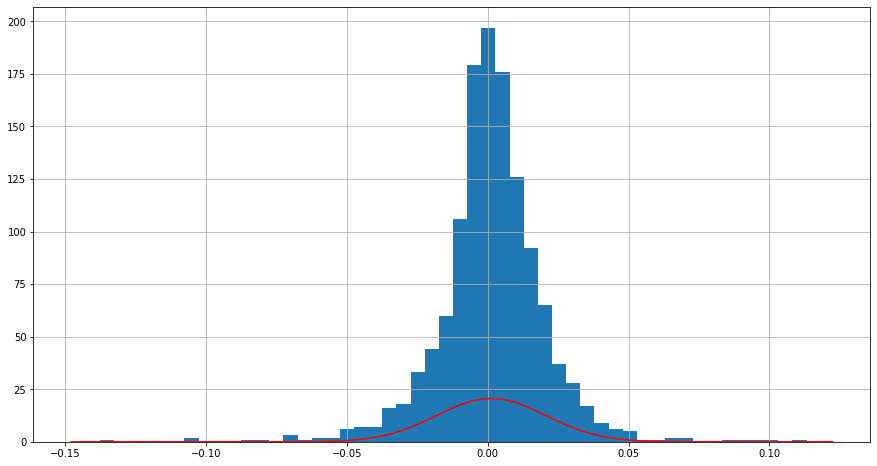

In [5]:
# Plot a histogram to show the distribution of log return of Apple stock. 
# Plote um histograma para mostrar a distribuição do retorno de log das ações da Apple.

# You can see it is very close to a normal distribution
# Você pode ver que está muito próximo de uma distribuição normal

from scipy.stats import norm
mu = aapl['LogReturn'].mean()
sigma = aapl['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(aapl['LogReturn'].min()-0.01, aapl['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

aapl['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [8]:
# probability that the stock price of apple will drop over 5% in a day
# probabilidade de que o preço das ações da apple caia mais de 5% em um dia

prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.004027472463291839


### Calculate the probability of the stock price will drop over a certain percentage in a year

In [9]:
# drop over 40% in 220 days
# queda de mais de 40% em 220 dias

mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.008568286713090383


### Calculate Value at risk (VaR)

In [10]:
# Value at risk(VaR)
# Valor em risco (VaR)

VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.030547508710859483


In [11]:
# Quatile
# Quartil

# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))

# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.030547508710859483
95% quantile  0.033133180379285254
